[View in Colaboratory](https://colab.research.google.com/github/sujittripathy/Google-Colab/blob/master/TradeTrans.ipynb)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',450)

import warnings
warnings.filterwarnings('ignore')

In [10]:
! pip install pydrive
# these classes allow you to request the Google drive API
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1o-1FCWVRBrLTihYJJHmtivPuFikTHSjq'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('file.csv')

In [61]:
df_sample=pd.read_csv('file.csv')
#print(df_sample['Commission'].sum())
df_sample_eq=df_sample[df_sample['SecurityType']=='EQ']
df_sample_optn=df_sample[df_sample['SecurityType']=='OPTN']
df_sample_optn['TransactionDate'] = pd.to_datetime(df_sample_optn['TransactionDate'])
df_sample_optn['Amount']=pd.to_numeric(df_sample_optn['Amount'])
df_sample_optn

,TransactionDate,TransactionType,SecurityType,Symbol,Quantity,Amount,Price,Commission,Description
1,2018-08-29,Sold Short,OPTN,AMD Sep 07 '18 $23 Put,-1.0,33.53,0.39,5.45,AMD Sep 07 '18 $23 Put
2,2018-08-29,Sold Short,OPTN,SQ Sep 07 '18 $77.50 Put,-1.0,29.53,0.35,5.45,SQ Sep 07 '18 $77.50 Put
3,2018-08-29,Bought To Cover,OPTN,AMD Aug 31 '18 $24 Put,1.0,-53.46,0.48,5.45,AMD Aug 31 '18 $24 Put
4,2018-08-28,Sold Short,OPTN,TSLA Aug 31 '18 $337.50 Call,-1.0,48.01,0.51,2.97,TSLA Aug 31 '18 $337.50 Call
5,2018-08-28,Bought To Open,OPTN,TSLA Aug 31 '18 $340 Call,1.0,-39.98,0.37,2.97,TSLA Aug 31 '18 $340 Call
6,2018-08-28,Sold Short,OPTN,AMD Aug 31 '18 $24 Put,-1.0,25.53,0.31,5.45,AMD Aug 31 '18 $24 Put
9,2018-08-27,Sold Short,OPTN,AMD Sep 14 '18 $21.50 Put,-1.0,13.53,0.19,5.45,AMD Sep 14 '18 $21.50 Put
10,2018-08-27,Sold Short,OPTN,AMZN Aug 31 '18 $1815 Put,-1.0,87.53,0.93,5.45,AMZN Aug 31 '18 $1815 Put
11,2018-08-27,Sold Short,OPTN,TWTR Sep 21 '18 $32.50 Put,-1.0,41.53,0.47,5.45,TWTR Sep 21 '18 $32.50 Put
12,2018-08-27,Bought To Cover,OPTN,TSLA Aug 31 '18 $272.50 Put,1.0,-95.46,0.90,5.45,TSLA Aug 31 '18 $272.50 Put


Total Option Commission 256.96
Total Equity Commission 26.75
Total Option Amount 171.02999999999986
AxesSubplot(0.125,0.125;0.775x0.755)


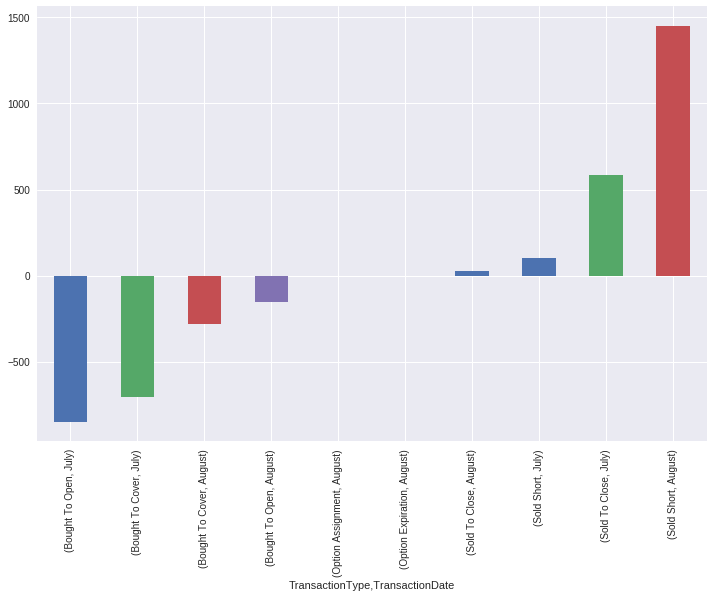

In [85]:
print("Total Option Commission",df_sample_optn['Commission'].sum())
print("Total Equity Commission",df_sample_eq['Commission'].sum())

print("Total Option Amount",df_sample_optn['Amount'].sum())




#df_sample_optn_f = df_sample_optn.groupby(df_sample_optn['TransactionDate'].dt.strftime('%B'))['Amount'].sum()
#print(df_sample_optn_f)
#print(df_sample_optn_f.plot.bar())

df_sample_optn_f2 = df_sample_optn.groupby(['TransactionType',df_sample_optn['TransactionDate'].dt.strftime('%B')])['Amount'].sum().sort_values()
plt.figure(figsize=(12,8)) 

print(df_sample_optn_f2.plot.bar())